# Part I - Explaining Loan Default: A Data Visualization Approach
## by Lawrence Agyepong

## Introduction


The objective of this project is to employ exploratory data visualization techniques to examine the factors that predict loan default. I use loan data from Prosper Marketplace containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 


**About the Company**

Prosper is the first peer-to-peer lending marketplace established in the United States in 2005. Since then, the company has helped more than 1,270,000 borrowers access more than \\$21 billion in loans. Through Prosper, individuals may make profitable and beneficial social investments in one another. Online applications are accepted for loans between $2,000 and \\$40,000 with fixed rates and fixed terms. Loan investments offer both individuals and institutions the chance to make a profit. On behalf of the investors and borrowers that were matched, Prosper manages all loan servicing. For more information about the company visit https://www.prosper.com/about. 

## Preliminary Wrangling


In [1]:
# Import all packages and set plots to be embedded inline
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output

warnings.simplefilter("ignore")

In [2]:
# Load the dataset
loan = pd.read_csv('data/prosperLoanData.csv')

In [3]:
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
loan.shape

(113937, 81)

### What is the structure of your dataset?

The data contains 113,937 loans with 81 variables. It comprises both quantitative and quality variables with some variables having missing values.


### What is/are the main feature(s) of interest in your dataset?

The primary objective is to identify the most important predictors of loan default. Hence the main feature of interest is  `LoanStatus`. The LoanStatus variable contains 12 categories: Current, Completed, ChargedOff, Defaulted, and Past Due Loans among others. Since this analysis is only interested in loans defaulted, I will filter the data to only include loans that are either completed or defaulted. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I suspect the following features to be predictors of loan default: 
 
1. Employment Status
2. Income Range
3. Borrower Rate: Borrower's interest rate for the loan. 
4. Prosper Score: A custom risk score built using historical Prosper data.
5. Credit Score Range Lower
6. Credit Score Range Upper
7. Debt to income ratio
8. Amount Delinquent

### Data Assessing and Cleaning

I will address the following two issues here:

- Filter the data to only include loans that are either completed or defaulted
- Drop features that are not relevant to this analysis

The above actions will declutter the data to allow a focused analysis

#### **Filter the data to only include loans which are either completed or defaulted**

##### Code

In [6]:
# View the values in LoanStatus
loan.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

- The number of loans Completed and Defaulted are 38074 and 5018 respectively.

In [7]:
# Filter to include only Completed and Defaulted Loans
loans_completed = loan.query('LoanStatus == "Completed"')
loans_defaulted = loan.query('LoanStatus == "Defaulted"')

# Concatenate the two dataframes
loans = pd.concat([loans_completed, loans_defaulted])
loans = loans.reset_index(drop=True)

##### Test

In [8]:
loans.LoanStatus.value_counts()

Completed    38074
Defaulted     5018
Name: LoanStatus, dtype: int64

#### Drop features that are not relevant to this analysis

##### Code

In [9]:
# Drop irrelevant columns
interest_columns = [
    'ListingKey', 'BorrowerRate', 'ProsperScore', 'EmploymentStatus',
    'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'AmountDelinquent',
    'DebtToIncomeRatio', 'IncomeRange', 'LoanStatus'
]

loans = loans[interest_columns].copy()

##### Test

In [10]:
loans.head()

,ListingKey,BorrowerRate,ProsperScore,EmploymentStatus,CreditScoreRangeLower,CreditScoreRangeUpper,AmountDelinquent,DebtToIncomeRatio,IncomeRange,LoanStatus
0,1021339766868145413AB3B,0.1580,NaN,Self-employed,640.0,659.0,472.0,0.17,"$25,000-49,999",Completed
1,0EE9337825851032864889A,0.2750,NaN,Not available,480.0,499.0,NaN,0.06,Not displayed,Completed
2,0F1734025150298088A5F2B,0.1325,NaN,Full-time,640.0,659.0,2224.0,0.27,"$1-24,999",Completed
3,1017340630713945364DA6B,0.2075,NaN,Full-time,620.0,639.0,5200.0,0.09,"$25,000-49,999",Completed
4,0F4F3571508214190FD75CB,0.2809,3.0,Employed,660.0,679.0,0.0,0.11,"$25,000-49,999",Completed


In [11]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43092 entries, 0 to 43091
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ListingKey             43092 non-null  object 
 1   BorrowerRate           43092 non-null  float64
 2   ProsperScore           20669 non-null  float64
 3   EmploymentStatus       41131 non-null  object 
 4   CreditScoreRangeLower  42550 non-null  float64
 5   CreditScoreRangeUpper  42550 non-null  float64
 6   AmountDelinquent       36832 non-null  float64
 7   DebtToIncomeRatio      40103 non-null  float64
 8   IncomeRange            43092 non-null  object 
 9   LoanStatus             43092 non-null  object 
dtypes: float64(6), object(4)
memory usage: 3.3+ MB


Now the data has 43092 loans and 10 features with:

5 Quantitative variables: 
- Continuous: `BorrowerRate`, `CreditScoreRatingLower`, `CreditScoreRatingUpper`, `AmountDelinquent`, `DebtToIncomeRatio`

4 Qualitative variables: 
- Ordinal: `ProsperScore`, `IncomeRange`
- Nominal: `EmploymentStatus`, `LoanStatus`

## Univariate Exploration

In this section, I investigate distributions of the individual variables.

### The Dependent Variable: Loan Status

First, I am going to explore the main variable of interest: LoanStatus

Since I will be creating numerous countplot and barplots, I create a function to prevent repetitive coding.

In [12]:
# A function that creates countplot
def countplot(x, rotate_xlabel=0):
    '''This function creates countplot
    Parameters
    ----------
    x: str, column 
    rotate_xlabel: int, angle of rotation of x-axis ticks'''
    plt.figure(figsize=[8, 5])
    sb.countplot(data=loans, x=x, color='black')
    plt.title('Distribution of ' + x)
    plt.xticks(rotation=rotate_xlabel)
    plt.ylabel('Frequency')


# Plot the distribution on a barplot
def Freq_plot(x, data=loans, rotate_xlabel=0):
    '''Create Relative Frequeny Barplot
    Parameters
    -----------
    x: str, column
    data: dataframe
     rotate_xlabel: int, angle of rotation of x-axis ticks'''
    # Create a dataframe of relative frequency
    rel_freq = 100 * (data.groupby(x).size() /
                      data.shape[0]).sort_values(ascending=False)
    rel_freq = rel_freq.reset_index(name='Relative Frequency')
    print(rel_freq)
    # Plot the data
    plt.figure(figsize=[8, 5])
    sb.barplot(data=rel_freq, x=x, y='Relative Frequency', color='black')
    plt.xlabel(x)
    plt.ylabel('Relative Frequency (%)')
    plt.xticks(rotation=rotate_xlabel)

  LoanStatus  Relative Frequency
0  Completed           88.355147
1  Defaulted           11.644853


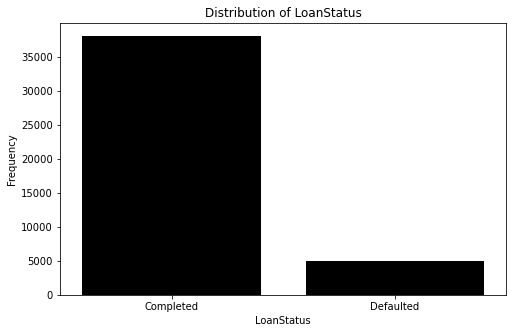

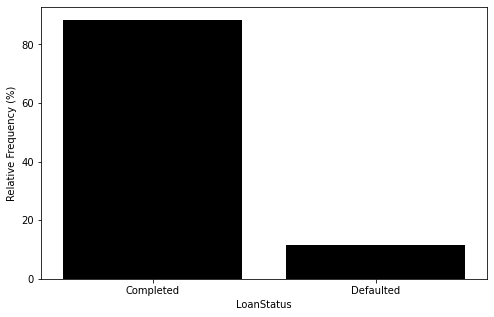

In [13]:
# LoanStatus distribution
countplot('LoanStatus')

# Now find the relative frequency distribution of LoanStatus
Freq_plot('LoanStatus')

The number of loans that have been completed dominates that data with over 35000 loans completed corresponding to more than 85% of the loans. 
For the purpose of subsequent analysis in the other sections, I will create a binary variable for the LoanStatus variable i.e., 1 for Defaulted and O for completed.

In [14]:
# Convert LoanStatus to binary
map_loan_status = {'Completed': 0, 'Defaulted': 1}
loans['default'] = loans.LoanStatus.replace(map_loan_status)

In [15]:
loans.head()

,ListingKey,BorrowerRate,ProsperScore,EmploymentStatus,CreditScoreRangeLower,CreditScoreRangeUpper,AmountDelinquent,DebtToIncomeRatio,IncomeRange,LoanStatus,default
0,1021339766868145413AB3B,0.1580,NaN,Self-employed,640.0,659.0,472.0,0.17,"$25,000-49,999",Completed,0
1,0EE9337825851032864889A,0.2750,NaN,Not available,480.0,499.0,NaN,0.06,Not displayed,Completed,0
2,0F1734025150298088A5F2B,0.1325,NaN,Full-time,640.0,659.0,2224.0,0.27,"$1-24,999",Completed,0
3,1017340630713945364DA6B,0.2075,NaN,Full-time,620.0,639.0,5200.0,0.09,"$25,000-49,999",Completed,0
4,0F4F3571508214190FD75CB,0.2809,3.0,Employed,660.0,679.0,0.0,0.11,"$25,000-49,999",Completed,0


### The Independent Variables

Next, I investigate the distributions of the features/predictors of loan status. 
I organize this part into qualitative and quantitative variables. 

#### Qualitative Variables
- EmploymentStatus
- IncomeRange
- ProsperScore

##### Employment Status

  EmploymentStatus  Relative Frequency
0        Full-time           45.516569
1         Employed           30.079829
2    Not available            9.934559
3    Self-employed            4.708531
4        Part-time            1.981806
5          Retired            1.199759
6            Other            1.167270
7     Not employed            0.860949


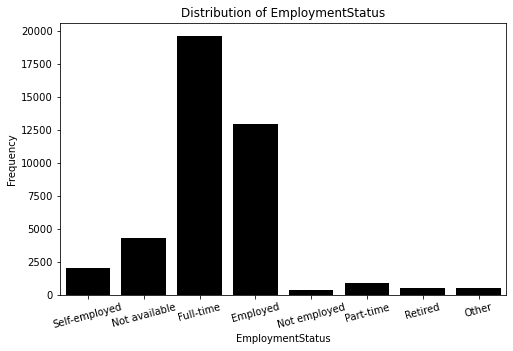

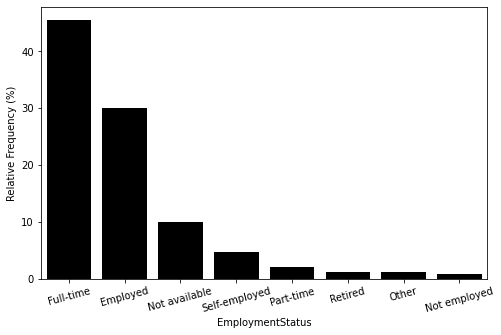

In [16]:
# Distribution of Employment Status
countplot('EmploymentStatus', rotate_xlabel=15)

# Relative Frequency Distribution
Freq_plot('EmploymentStatus', rotate_xlabel=15)

Over 45% of the loan applicants have full-time jobs, and about 30% are in the 'Employed' category, 10% are missing observations, about 5% are self_employed and the rest are either part-time, retire, or not employed. There is some ambiguity concerning the "Employed" category. I don't seem to understand how those in that category are different from the other forms of employment i.e., full-time and self-employed. 

##### Income Range and ProsperScore

In [17]:
# Exclude the rows with ProsperScore of 11
loans.ProsperScore = loans.ProsperScore.replace(11, np.nan)

In [18]:
# Replace $0 with Nan
loans.IncomeRange = loans.IncomeRange.replace('$0', np.nan)

In [19]:
# convert IncomeRange and ProsperScore into ordered categorical types
ordinal_var_dict = {
    'IncomeRange': [
        'Not employed', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
        '$75,000-99,999', '$100,000+', 'Not displayed'],
    'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(
        ordered=True, categories=ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

      IncomeRange  Relative Frequency
0  $25,000-49,999           28.267428
1  $50,000-74,999           23.568180
2   Not displayed           14.752158
3  $75,000-99,999           12.273740
4       $100,000+           11.825861
5       $1-24,999            7.523438
6    Not employed            0.812216


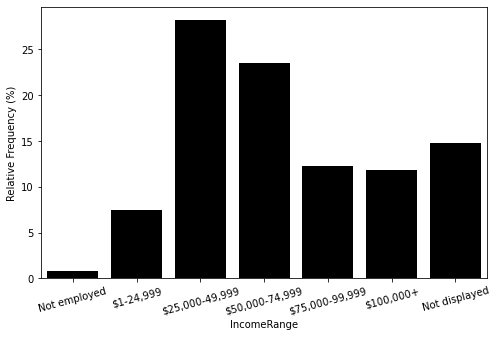

In [20]:
# Distribution of Income Range
Freq_plot('IncomeRange', rotate_xlabel=15)

About half of the loan applicants fall within the \\$25,000-74,999 income bracket. Also, approximately 12% and 11.8% are in the \\$75,000-99,999 and \\$100,000+ brackets respectively. The remaining are distributed among \\$1-24,999, \\$0, Not employed, and those who did Not display their income level. I find the \\$0 confusing so I will investigate further. 

  ProsperScore  Relative Frequency
0            8            8.934373
1            6            7.008261
2            9            6.746032
3            7            5.782976
4            5            5.516105
5            4            4.518240
6           10            3.703704
7            3            2.673350
8            2            2.130326
9            1            0.877193


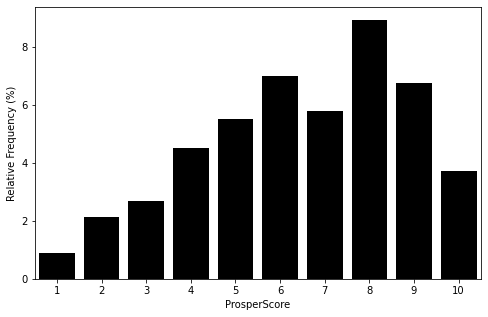

In [21]:
# Distribution of ProsperScore
Freq_plot('ProsperScore')

We observe that, for clients whose ProsperScores are available, about 8.9% scored 8, 7% scored 6, and 6.7% scored 9. Prosper Score is left-skewed with a large number of clients having high scores. Furthermore, we notice a score of 11. This is unusual since the Prosper Score ranges from 1 to 10. I will remove them from the analysis. 

#### Quantitative Variables

- BorrowerRate 
- CreditScoreRatingLower
- CreditScoreRatingUpper 
- AmountDelinquent
- DebtToIncomeRatio

In [22]:
# summary statistics of the quantitative variables
col = [
    'BorrowerRate', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
    'AmountDelinquent', 'DebtToIncomeRatio']
loans[col].describe()

,BorrowerRate,CreditScoreRangeLower,CreditScoreRangeUpper,AmountDelinquent,DebtToIncomeRatio
count,43092.000000,42550.000000,42550.000000,36832.000000,40103.000000
mean,0.190691,678.154642,697.154642,923.241475,0.276643
std,0.080835,81.439016,81.439016,6285.546282,0.681714
min,0.000000,0.000000,19.000000,0.000000,0.000000
25%,0.123000,640.000000,659.000000,0.000000,0.120000
50%,0.180000,680.000000,699.000000,0.000000,0.190000
75%,0.257600,740.000000,759.000000,0.000000,0.300000
max,0.497500,880.000000,899.000000,327677.000000,10.010000


In [23]:
# A function that creates histogram
def hist(x, data, bins='auto', xscale_log=False):
    '''Create Histograms
    Parameters
    ----------- 
    x: str, column
    data: dataframe
    bins: int, numbers of bins for the histogram
    xscale_log: bool, use logarithm scale for x-axis'''

    plt.figure(figsize=[8, 5])
    if xscale_log == False:
        sb.histplot(data=data, x=x, color='black', bins=bins)
        plt.title('Distribution of ' + x)
    else:
        sb.histplot(data=data, x=x, color='black')
        plt.title('Distribution of ' + x)
        plt.xscale('log')

##### Borrower Rate

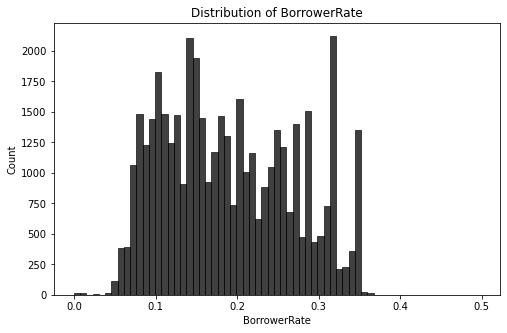

In [24]:
# The distribution of BorrowerRate
hist('BorrowerRate', data=loans)

Borrower Rate appears to be roughly bimodally distributed with peaks over 2,000 corresponding to rates around 15% and 33%. We observe that Borrower Rate mostly falls within 10-25%.  

##### Credit Score Range

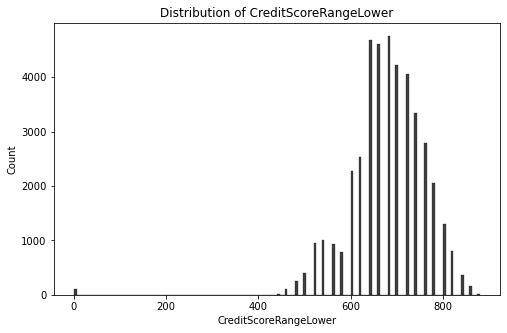

In [25]:
# Distribution of CreditScoreRange Lower
hist('CreditScoreRangeLower', data=loans)

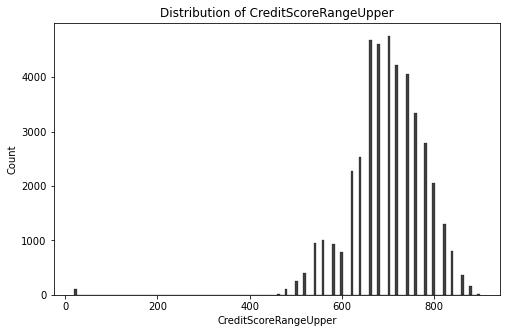

In [26]:
# Credit Score Range Upper
hist('CreditScoreRangeUpper', data=loans)

Notice that the lower and upper range of Credit Score have identical distributions. Both are roughly normally distributed with a large number of observations falling within 600 - 800. Also, in both plots, we can spot outliers having scores less than 50. Since both have the same distribution, I will only use one of them (i.e., CreditScoreRangeLower) in subsequent analysis.

In [27]:
# Investigate outliers in CreditScoreRangeLower
loans.query('CreditScoreRangeLower < 50')

,ListingKey,BorrowerRate,ProsperScore,EmploymentStatus,CreditScoreRangeLower,CreditScoreRangeUpper,AmountDelinquent,DebtToIncomeRatio,IncomeRange,LoanStatus,default
250,00EF338150577356881AD6B,0.29,NaN,Not available,0.0,19.0,NaN,NaN,Not displayed,Completed,0
1891,3A653376194703222361286,0.23,NaN,Not available,0.0,19.0,NaN,0.09,Not displayed,Completed,0
4557,984433750354102495B4C24,0.17,NaN,Not available,0.0,19.0,NaN,NaN,Not displayed,Completed,0
6557,4B183368381941574321973,0.29,NaN,Not available,0.0,19.0,NaN,NaN,Not displayed,Completed,0
6894,16063374551930942E5E2D6,0.29,NaN,Not available,0.0,19.0,NaN,0.07,Not displayed,Completed,0
...,...,...,...,...,...,...,...,...,...,...,...
42674,95FF3365358878100898AD8,0.29,NaN,Not available,0.0,19.0,NaN,0.14,Not displayed,Defaulted,1
42771,C3B33376707487412A1E350,0.29,NaN,Not available,0.0,19.0,NaN,0.04,Not displayed,Defaulted,1
42871,54DC3365802328009FF20B9,0.24,NaN,Not available,0.0,19.0,NaN,0.04,Not displayed,Defaulted,1
42884,72E93377660989703675AE5,0.25,NaN,Not available,0.0,19.0,NaN,NaN,Not displayed,Defaulted,1


count    42550.0
mean        19.0
std          0.0
min         19.0
25%         19.0
50%         19.0
75%         19.0
max         19.0
dtype: float64


Text(0.5, 0, 'Credit Score Range')

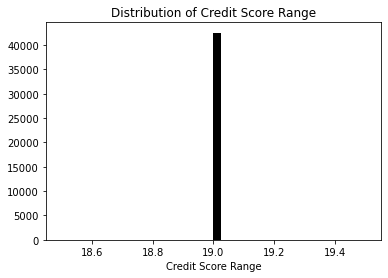

In [28]:
# find the Credit Score Range
CreditScoreRange = loans.CreditScoreRangeUpper - loans.CreditScoreRangeLower
print(CreditScoreRange.describe())
plt.hist(CreditScoreRange, bins=40, color='black')
plt.title('Distribution of Credit Score Range')
plt.xlabel('Credit Score Range')

The above graph reveals that, for all the clients, the Credit Score Upper bound is greater than the lower bound by 19. This explains why they both have identical distributions. Also, these values (i.e., the outliers) are the minimums of the upper and lower bounds. I will drop those rows. 

In [29]:
# drop outliers
loans = loans[loans.CreditScoreRangeLower > 50]

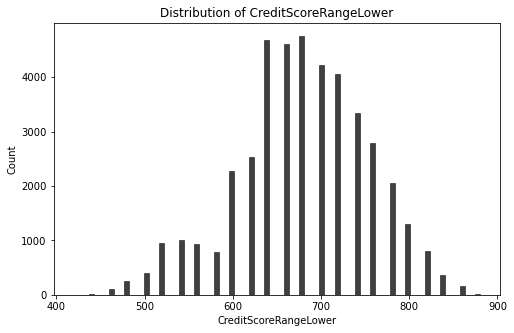

In [30]:
hist('CreditScoreRangeLower', data=loans)

##### Amount Delinquent

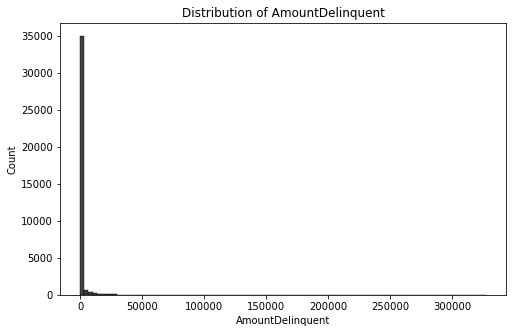

In [31]:
# The Distribution of Amount Delinquent
hist('AmountDelinquent', data=loans, bins=100)

Seems most of the values fall around zero. I will investigate it further. 

   AmountDelinquent  Relative Frequency
0               0.0           99.902337
1               2.0            0.019533
2               5.0            0.019533
3               3.0            0.009766
4               6.0            0.009766
5               8.0            0.009766
6               9.0            0.009766
7               1.0            0.006511
8               4.0            0.006511
9               7.0            0.006511


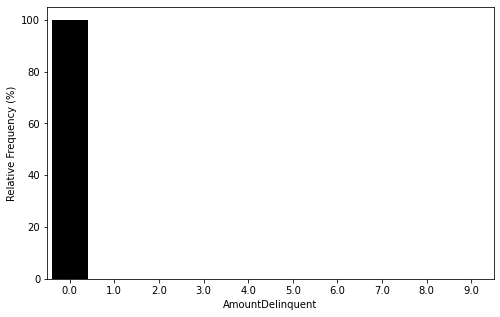

In [32]:
# Investigate the frequeny of the value between 0 - 10
Freq_plot('AmountDelinquent', data=loans[loans.AmountDelinquent < 10])

The Amount Delinquent variable is highly skewed. Even after log transformation, the variable is still highly skewed. By increasing the bins to 100, we discover that a large amount (99.9%) of the observations are zeros. 
As result, I will exclude this variable from further analysis. 

##### Debt To Income Ratio

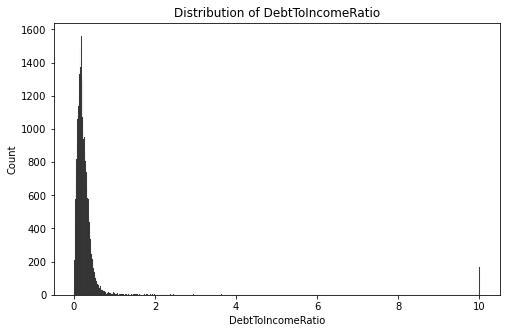

In [33]:
# Distribution of Debt To Income Ratio
hist('DebtToIncomeRatio', data=loans)

Debt to income ratio is right-skewed with a large number of clients falling within the 0-100% interval. We observe values greater than 1 indicating clients with Debt to income ratios greater than 100%. Notice there are client values over 10. According to the company, these are clients with extremely high debt to income ratios i.e., over 1000%! Let's investigate the value further. 

(0.0, 1.0)

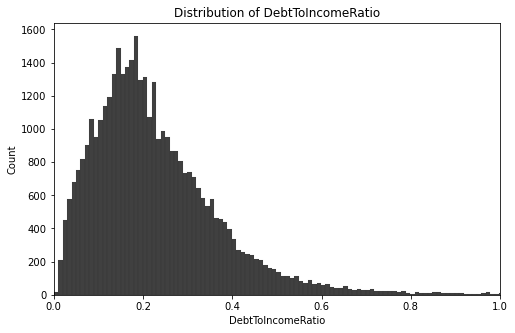

In [34]:
# Distribution of Debt To Income Ratio between 0 - 100%
hist('DebtToIncomeRatio', data=loans)
plt.xlim(0, 1);

By limiting the x-axis to values between 0 - 100%, we observe that majority of clients fall within the 10% - 30% debt to income ratio bracket. Moving on, I will convert the variable into categorical (ordinal) to enhance the subsequent analysis. 

In [35]:
# Convert DebtToincomeRatio into ordinal variable
ordinal_debt_ratio = pd.cut(loans.DebtToIncomeRatio,
                            bins=[0, 0.13, 0.2, 0.3, 1, 10, 10.2],
                            labels=[
                                '0 to 13%', '13+ to 20%', '20+ to 30%',
                                '30+ to 100%', '100+ to 1000%', '1000% plus'
                            ],
                            ordered=True)
# Add to the loans Dataframe
loans['debt_ratio'] = ordinal_debt_ratio

      debt_ratio  Relative Frequency
0       0 to 13%           26.187223
1     13+ to 20%           23.058984
2     20+ to 30%           21.805804
3    30+ to 100%           20.938943
4  100+ to 1000%            0.661924
5     1000% plus            0.391030


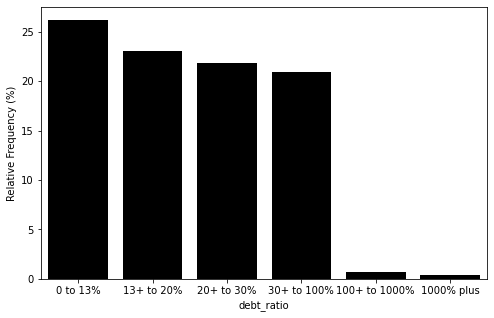

In [36]:
# Plot the new debt ratio using relative Frequency
Freq_plot('debt_ratio', loans)

In our new debt to income ratio variable, about 26% of clients have a debt ratio between 0 - 13%, 23% are between 13 and 20%, and 41% fall within 20 to 100%. In addition, 6.6% fall beyond 100% but less than 1000%, and some 4% fall beyond 1000%.

In [37]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42452 entries, 0 to 43091
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ListingKey             42452 non-null  object  
 1   BorrowerRate           42452 non-null  float64 
 2   ProsperScore           20637 non-null  category
 3   EmploymentStatus       41057 non-null  object  
 4   CreditScoreRangeLower  42452 non-null  float64 
 5   CreditScoreRangeUpper  42452 non-null  float64 
 6   AmountDelinquent       36832 non-null  float64 
 7   DebtToIncomeRatio      39513 non-null  float64 
 8   IncomeRange            42031 non-null  category
 9   LoanStatus             42452 non-null  object  
 10  default                42452 non-null  int64   
 11  debt_ratio             39499 non-null  category
dtypes: category(3), float64(5), int64(1), object(3)
memory usage: 3.4+ MB


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The number of loans that have been completed dominates that data with over 35000 loans completed corresponding to more than 85% of the loans. I created a new binary variable for Loan Status which takes a value of 1 for Defaulted and O for completed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I converted Prosper Score and Income Range into ordinal variables because their orderings matter to the analysis. I removed values less than 50 from the Credit Score Range variable to get rid of outliers. Furthermore, I will convert the Debt to Income Ratio variable into ordinal to avoid data loss and enhance the analysis.

In [38]:
# Save the loans data set.
loans.to_csv('clean_loans.csv', index=False)

## Bivariate Exploration

In this section, I investigate the relationships between pairs of the variables explored under the univariate section. 
In particular, I will explore the relationship between Loan Status and the following:
- Employment Status
- Income Range
- Prosper Score
- Debt Ratio 
- Borrower Rate
- Credit Score Range Lower

Also, I suspect a relationship between:
- Employment Status and Income 
- Income and Debt Ratio
- Income and Credit Score

### Loan Status and Employment Status

##### Does loan default rate differ among employment status?

##### Visualization 

  EmploymentStatus  Default Rate
0    Not available     27.596862
1    Self-employed     12.124199
2        Full-time     11.303151
3          Retired     11.218569
4            Other     10.735586
5     Not employed      7.277628
6        Part-time      7.025761
7         Employed      4.860361


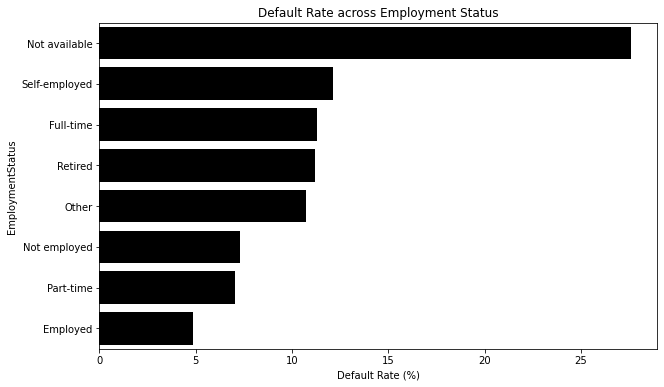

In [39]:
# Barplot of Default and Employment status
default_employ_status = loans.groupby(
    'EmploymentStatus')['default'].mean().sort_values(ascending=False) * 100
default_employ_status = default_employ_status.reset_index(name='Default Rate')

plt.figure(figsize=[10, 6])
sb.barplot(data=default_employ_status,
           y='EmploymentStatus',
           x='Default Rate',
           color='black')
plt.title('Default Rate across Employment Status')
plt.xlabel('Default Rate (%)')

print(default_employ_status)

##### Observation

Clients whose employment status is not available had the highest default rate (27.6%). Self-employed and those with Full-time jobs place second and third with default rates of 12.1% and 11.3% respectively. On the far end, we have those who are "Employed" having the least default rate of about 4.9%.

### Loan Status and Income Range

##### Does loan default rates vary across income levels? 

##### Visualization

In [40]:
# A function for create Clustered bar and barplot
def Cluster_Barplot(x, y, xticks_rotation=20, barplot=True):
    # Plot a clustered barplot
    plt.figure(figsize=[20, 6])
    plt.suptitle('Relationship between ' + x + ' and ' + y)
    # Countplot of x and y
    plt.subplot(1, 2, 1)
    sb.countplot(data=loans, x=x, hue=y)
    plt.xticks(rotation=xticks_rotation)

    # Barplot of x againt y
    if barplot == True:
        plt.subplot(1, 2, 2)
        sb.barplot(data=loans, x=x, y=y, color='black', ci=None)
        plt.xticks(rotation=xticks_rotation)
    else:
        pass

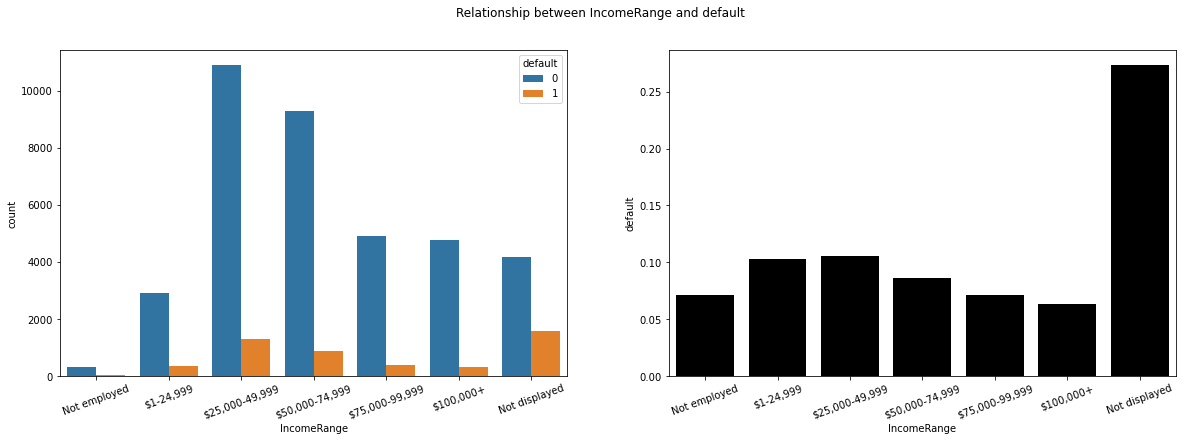

In [41]:
Cluster_Barplot(x='IncomeRange', y='default')

##### Observation

The plot on the left shows that the distribution of clients who have completed their loans and those that defaulted are similar. However, we notice that clients whose income level is not displayed have the highest default counts compared to the other categories. The plot on the right confirms that clients whose income levels are not displayed have the highest default rate i.e., about 27%. Those with \\$0 income have a default rate of 12.1%, followed by those in \\$25,000-49,999 and \\$1-24,999 brackets with default rates of 10.5% and 10.3% respectively. Those in the highest income bracket i.e., \\$100,000+ has the least default rate. 
**Generally, we observe that the default rate decreases with income. That is, higher income levels correspond to lower default rates.**

### Loan Status and Prosper Score

##### What is the relationship between default rates and ProsperScore?

##### Visualization

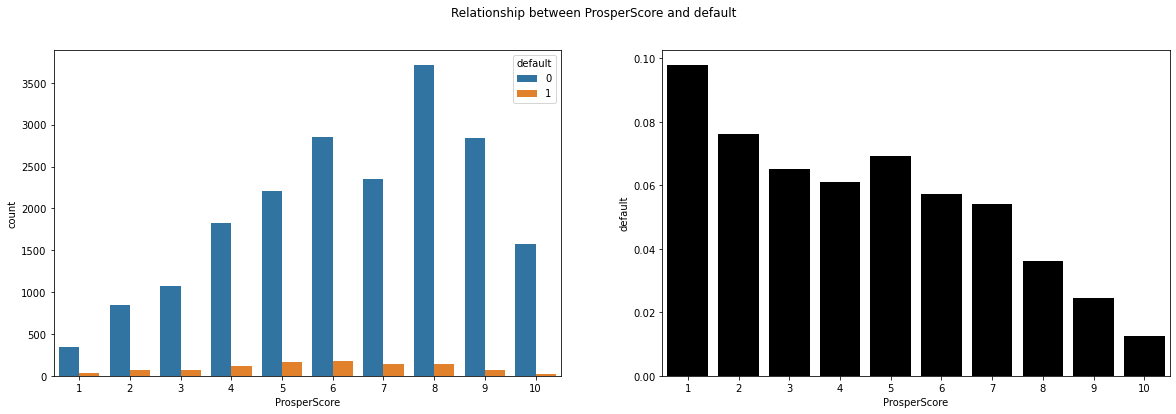

In [42]:
Cluster_Barplot(x='ProsperScore', y='default', xticks_rotation=0)

##### Observation

On the second graph, we observe that aside from Score 5, there is an overall inverse relationship between default rate and Prosper Score for scores from 1 to 10. That is high Prosper Scores correspond to lower levels of default rate. 

### Loan Status and Debt to Income Ratio

##### What is the relationship between default rates and debt ratio?

##### Visualization

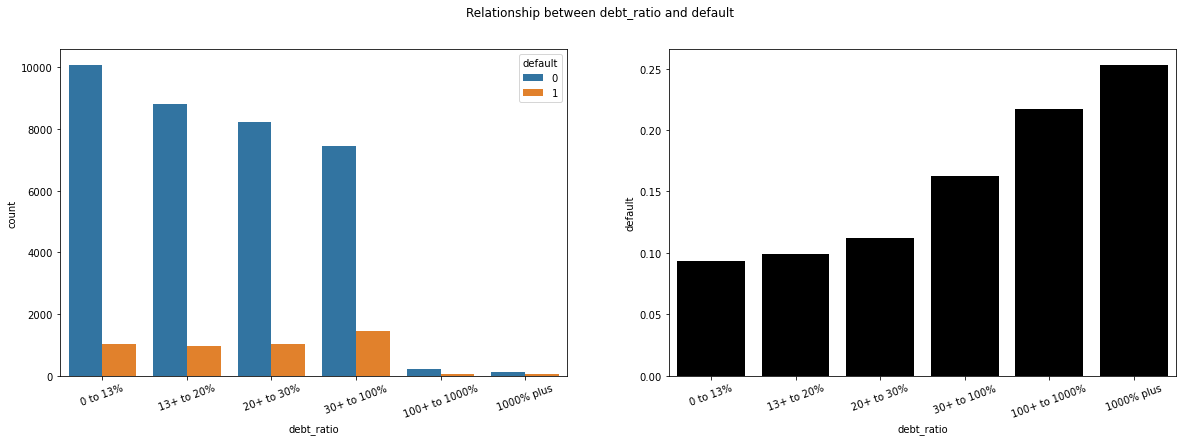

In [43]:
# Create a Clustered bar and barplot
Cluster_Barplot(x='debt_ratio', y='default')

##### Observation

From the Clustered bar graph (first graph), we notice that the frequency of loans completed declines as we to higher levels of debt ratio. On that same graph, observe that the frequency of loans defaulted increases at higher levels of the debt ratio, although not so clear. The second graph provides a better picture of this relationship. We clearly see that loan default rate increases and the debt ratio increases. This makes sense since an individual who is already overburdened with debt will be unable to repay the loan. 

### Loan Status and Borrower Rate

##### What is the relationship between default rates and borrower rate?

##### Visualization

Text(0.5, 1.0, 'Relationship between Loan Status and Borrower Rate')

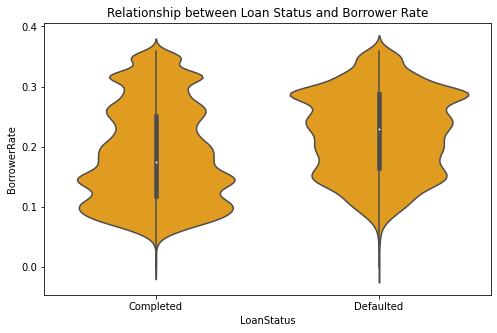

In [44]:
# Relationship between default rates and borrower rate
plt.figure(figsize=[8, 5])
sb.violinplot(data=loans, x='LoanStatus', y='BorrowerRate', color='orange')
plt.title('Relationship between Loan Status and Borrower Rate');

##### Observation

I use a violin plot to display the relationship between Loan status and Borrower Rate. We observe that Borrower Rate among those who defaulted is higher compared to those who completed the loan. Also, while the Borrower Rate for a majority of those who completed the loan is below 20%, a large of those who defaulted have Borrower Rates above 20%. This suggests that a high Borrower rate is associated with a high default rate.

### Loan Status and Credit Score Range Lower

##### What is the relationship between default rates and credit score?

##### Visualization

Text(0.5, 1.0, 'Relationship between Loan Status and Credit Score')

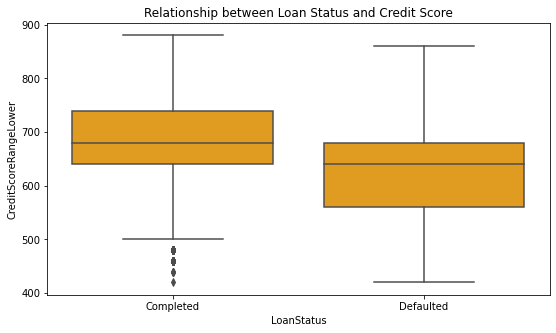

In [45]:
# Boxplot of Loan Status against Credit Score Range Lower
plt.figure(figsize=[9, 5])
sb.boxplot(data=loans,
           x='LoanStatus',
           y='CreditScoreRangeLower',
           color='orange')
plt.title('Relationship between Loan Status and Credit Score');

##### Observation

Credit Score is higher among those who completed their loans compared to those who defaulted. 

### Employment Status and Borrower Rate

##### What is the relationship between employment status and borrower rate?

##### Visualization

  EmploymentStatus  Borrower Rate
0            Other      24.470477
1     Not employed      21.919784
2         Employed      21.208170
3    Self-employed      20.336018
4    Not available      18.437266
5          Retired      18.007969
6        Full-time      17.647007
7        Part-time      17.447518


Text(0.5, 0, '')

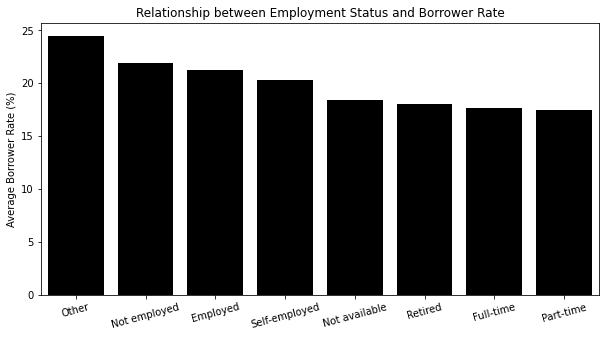

In [46]:
# Visualize the relationship between employment status and borrower rate
employ_borrower_rate = loans.groupby('EmploymentStatus')['BorrowerRate'].mean(
).sort_values(ascending=False) * 100
employ_borrower_rate = employ_borrower_rate.reset_index(name='Borrower Rate')
print(employ_borrower_rate)

# Plot the relationship between employment status and borrower rate
plt.figure(figsize=[10, 5])
sb.barplot(data=employ_borrower_rate,
           x='EmploymentStatus',
           y='Borrower Rate',
           color='black')
plt.title('Relationship between Employment Status and Borrower Rate')
plt.xticks(rotation=15)
plt.ylabel('Average Borrower Rate (%)')
plt.xlabel('');

##### Observation

Borrower rate differs marginally across employment groups with "Others" having the highest and "Part-time" having the least. 

### Income and Debt Ratio

##### What is the relationship between income and debt ratio

###### Visualization

      IncomeRange  Debt Ratio
0    Not employed        27.0
1       $1-24,999        30.0
2  $25,000-49,999        23.0
3  $50,000-74,999        20.0
4  $75,000-99,999        18.0
5       $100,000+        15.0
6   Not displayed        17.0


Text(0.5, 0, '')

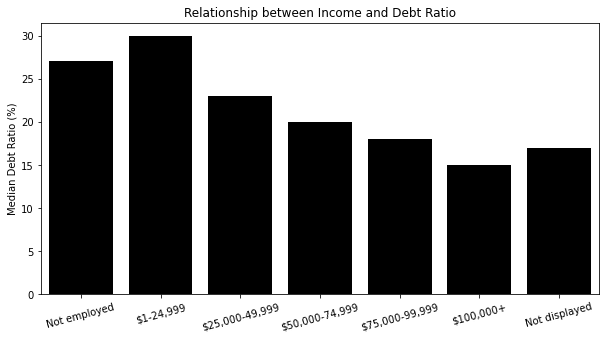

In [47]:
# Visualize the relationship between income and debt ratio]
income_debt = loans.groupby('IncomeRange')['DebtToIncomeRatio'].median() * 100
income_debt = income_debt.reset_index(name='Debt Ratio')
print(income_debt)

# Plot the relationship between income and debt
plt.figure(figsize=[10, 5])
sb.barplot(data=income_debt, x='IncomeRange', y='Debt Ratio', color='black')
plt.title('Relationship between Income and Debt Ratio')
plt.xticks(rotation=15)
plt.ylabel('Median Debt Ratio (%)')
plt.xlabel('');

##### Observation

By comparing the median debt ratio across income groups, we observe that the debt ratio decreases with income level. That is, clients with higher income levels have lower debt-to-income ratios. I suspect that this may have an interactive effect on Loan Status. Note that, I used the median debt ratio because of the presence of outliers.

### Income and Credit Score

##### What is the relationship between Income and Credit Score?

##### Visualization

      IncomeRange  Credit Score
0    Not employed    692.057143
1       $1-24,999    666.983344
2  $25,000-49,999    675.271324
3  $50,000-74,999    689.842458
4  $75,000-99,999    703.720930
5       $100,000+    718.524333
6   Not displayed    620.108448


Text(0.5, 0, '')

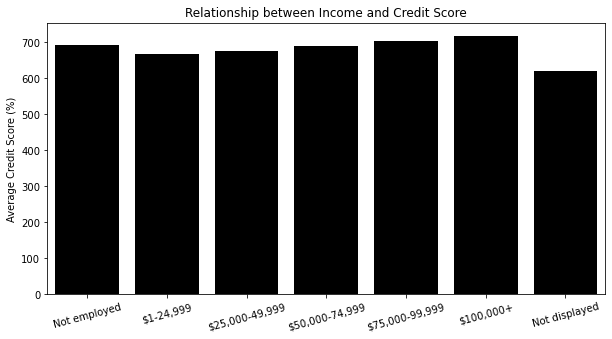

In [48]:
# Visualize the relationship between income and credit score
income_creditscore = loans.groupby(
    'IncomeRange')['CreditScoreRangeLower'].mean()
income_creditscore = income_creditscore.reset_index(name='Credit Score')
print(income_creditscore)

# Plot the relationship between income and debt
plt.figure(figsize=[10, 5])
sb.barplot(data=income_creditscore,
           x='IncomeRange',
           y='Credit Score',
           color='black')
plt.title('Relationship between Income and Credit Score')
plt.xticks(rotation=15)
plt.ylabel('Average Credit Score (%)')
plt.xlabel('');

##### Observation

Clients whose income levels are not displayed have the least credit score. We observe that credit score increases with income from \\$1-24,999 to \\$100,000+. However, the overall relationship is confusing since those with \\$0 incomes have higher credit scores than those in the  \\$1-24,999 to \\$50,000-74,999 income groups. Hence the relationship is inconclusive. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Loan default rate differs across employment groups. 
- There is a negative relationship between default rate and income such that higher income levels correspond to lower default rates.
- Prosper Scores and default rates are inversely related such that higher Prosper Scores correspond to lower levels of default rate.
- Loan default rate and the debt ratio are positively associated. 
- Borrower rate is positively associated with the default rate. That is, at high levels of borrower rate, the default rate is high. 
- Credit Score is negatively related to default rate i.e., Credit Score is higher among those who completed their loans compared to those who defaulted.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- The borrower rate differs marginally across employment groups with "Others" having the highest and "Part-time" having the least.
- There is a negative association between debt ratio and income level. That is, high-income clients have lower debt-to-income ratios.
- The relationship between income and credit score is inconclusive. 

## Multivariate Exploration

In this section, we investigate the interactive effects of the following variables on Loan Status:
- Employment Status and Borrower Rate
- Income and Debt Ratio

### Loan Status, Employment Status and Borrower Rate

##### How does employment status affect the relationship between loan status and borrower rate?

##### Visualization

Text(0.5, 0, '')

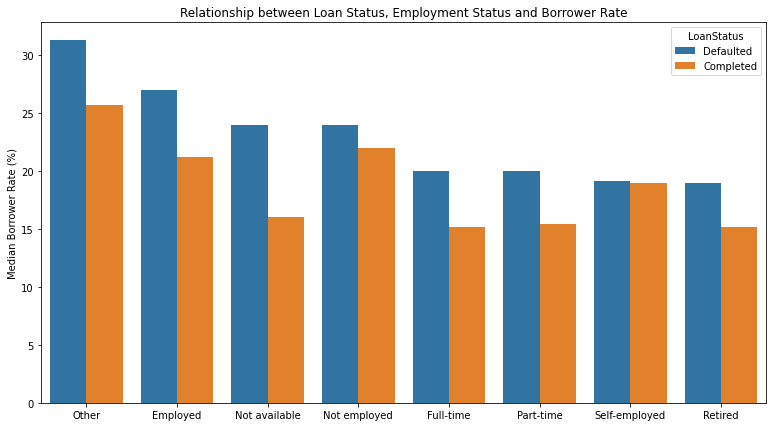

In [49]:
# Visualizing the relationship between employment status, loan status and borrower rate
loan_emp_bor = loans.groupby([
    'EmploymentStatus', 'LoanStatus'
])['BorrowerRate'].median().sort_values(ascending=False) * 100
loan_emp_bor = loan_emp_bor.reset_index(name='Median Borrower Rate')

plt.figure(figsize=[13, 7])
sb.barplot(data=loan_emp_bor,
           x='EmploymentStatus',
           y='Median Borrower Rate',
           hue='LoanStatus')
plt.title(
    'Relationship between Loan Status, Employment Status and Borrower Rate')
plt.ylabel('Median Borrower Rate (%)')
plt.xlabel('');

##### Observation

Generally, we observe that the borrower rate for clients who defaulted is higher than those who completed the loan. On average, clients in the "Other" employment group have the highest borrower rate. In contrast, those in the "Retired" group have the least borrower rate. Furthermore, notice that the difference in borrower rate between clients that defaulted and those who completed is greatest among clients whose employment status is Not available (8%) and smallest for the Self-employed (0.26%).

### Loan Status, Income, and Debt Ratio

##### How does income affect the relationship between loan status and debt ratio?

##### Visualization

Text(0.5, 0, '')

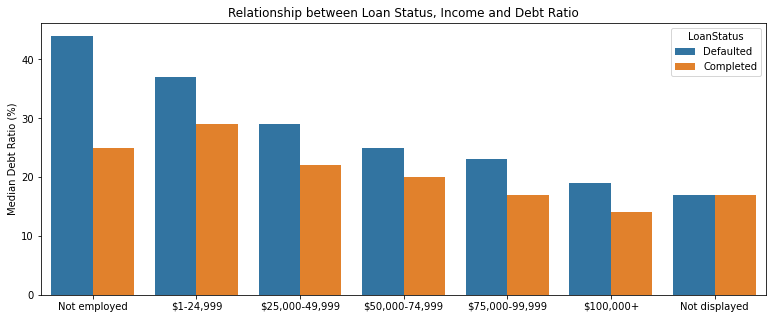

In [50]:
# Visualizing the relationship between loan Status, Income and debt ratio
loan_income_debt = loans.groupby([
    'IncomeRange', 'LoanStatus'
])['DebtToIncomeRatio'].median().sort_values(ascending=False) * 100
loan_income_debt = loan_income_debt.reset_index(name='Median Debt Ratio')

plt.figure(figsize=[13, 5])
sb.barplot(data=loan_income_debt,
           x='IncomeRange',
           y='Median Debt Ratio',
           hue='LoanStatus')
plt.title('Relationship between Loan Status, Income and Debt Ratio')
plt.ylabel('Median Debt Ratio (%)')
plt.xlabel('');

##### Observation

Observe that on average, for clients whose income is displayed, the debt ratio is higher for clients that defaulted compared to those that completed the loan. Also, the difference in debt ratio between those that defaulted and those that completed is largest among clients who are not employed.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest? 

- The difference in borrower rate between clients that defaulted and those who completed varies across employment groups. The gap is greatest among clients whose employment status is Not available (8%) and smallest for the Self-employed (0.26%).

- The difference in debt ratio between those that defaulted and those that completed is largest among clients who are not employed.

## Conclusions

This analysis aimed to examine the predictors of loan default using exploratory data visualization techniques. Specifically, I investigated the relationship between loan default and the following variables: Employment Status, Income, Borrower Rate, Prosper Score, Credit Score, Debt to Income Ratio, and Amount Delinquent. I used data provided by Udacity containing 113,937 loans from Prosper Marketplace. 

**Summary of Findings**
- I found that income, prosper score, and credit score has a negative relationship with loan default rates while borrower rate and debt to income ratios have a positive relationship with loan default rates. 
- Also, the loan default rate was found to differ across employment groups. 
- Furthermore, I found that the difference in borrower rate between clients that defaulted and those who completed varies across employment groups. 
- Similarly, the difference in debt ratio between those that defaulted and those that completed is largest among clients who are not employed.